# Customer Segmentation Analysis
We'll be using the KMeans algorithm to cluster individuals for a customer segmentation analysis.

We will use univariate, bivariate and multivariate clustering to determine optimum clusters.

Import libraries

In [129]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the dataset.

In [130]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis
##### Univariate Analysis

Some statistical analysis.

In [131]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


History and kernel density plot for numeric columns.

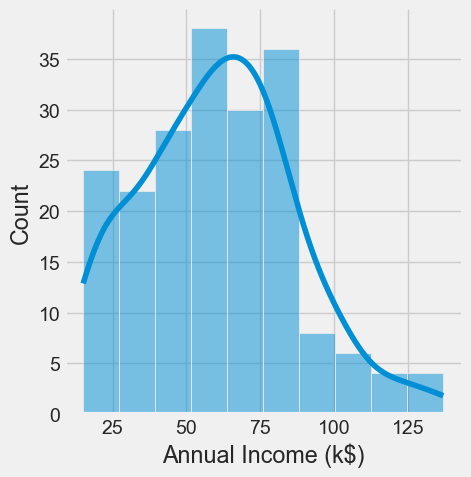

In [132]:
sns.displot(data=df, x="Annual Income (k$)", kde=True)
plt.show()

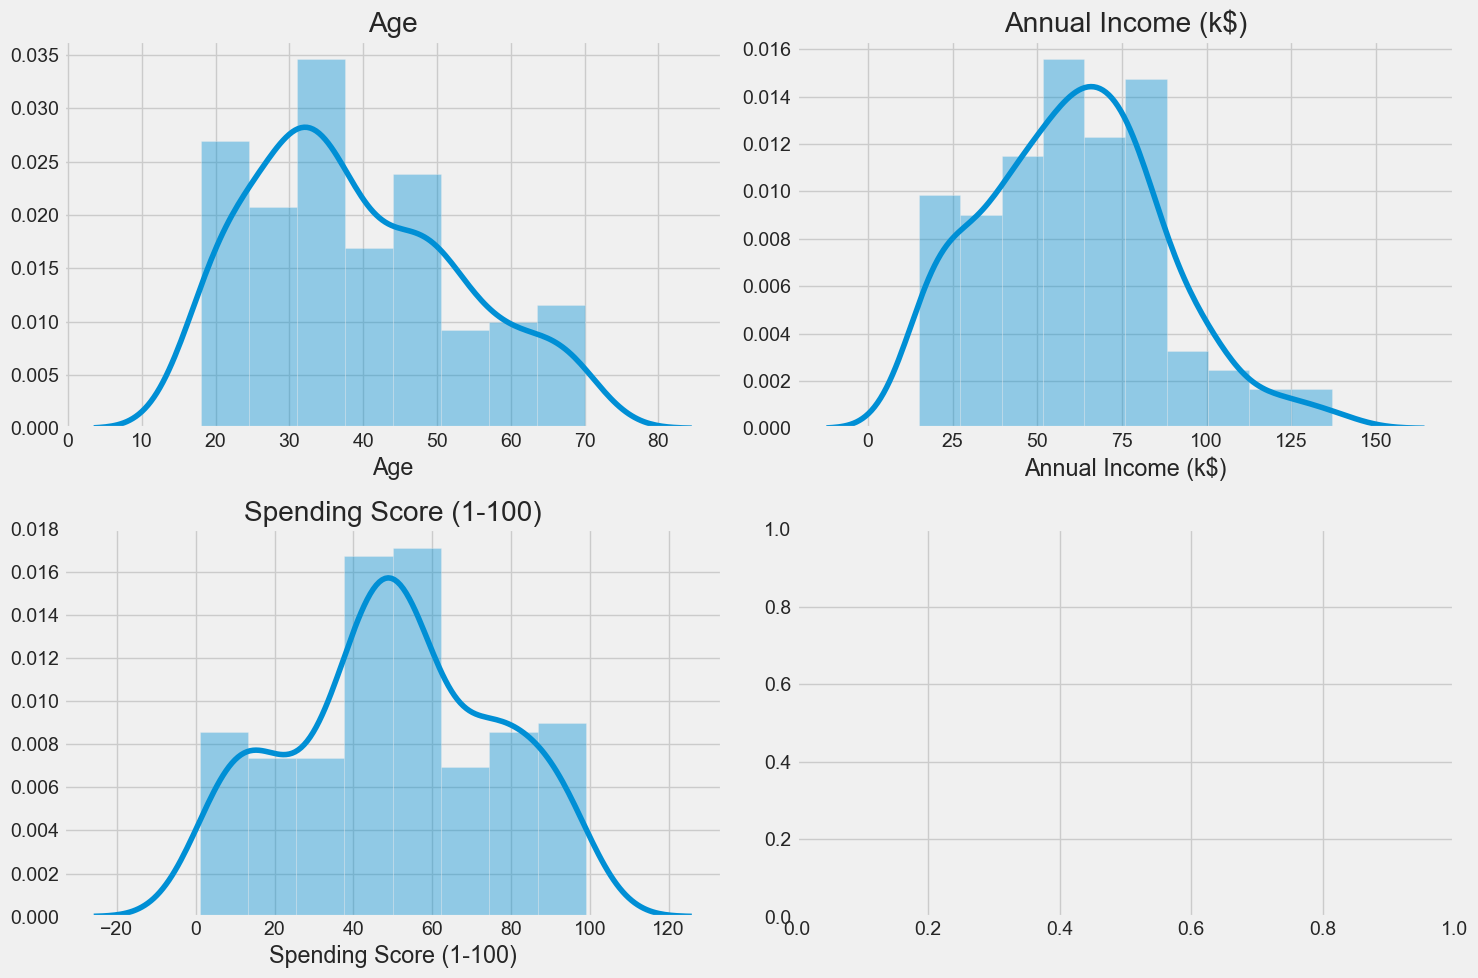

In [133]:
columns = list(df.columns[2:])
num_plots = list(range(3))

fig, axes = plt.subplots(2,2, figsize=(15,10))
for ax, col in zip(axes.ravel(), columns):
    sns.distplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

kdeplot for numeric columns segmented by gender

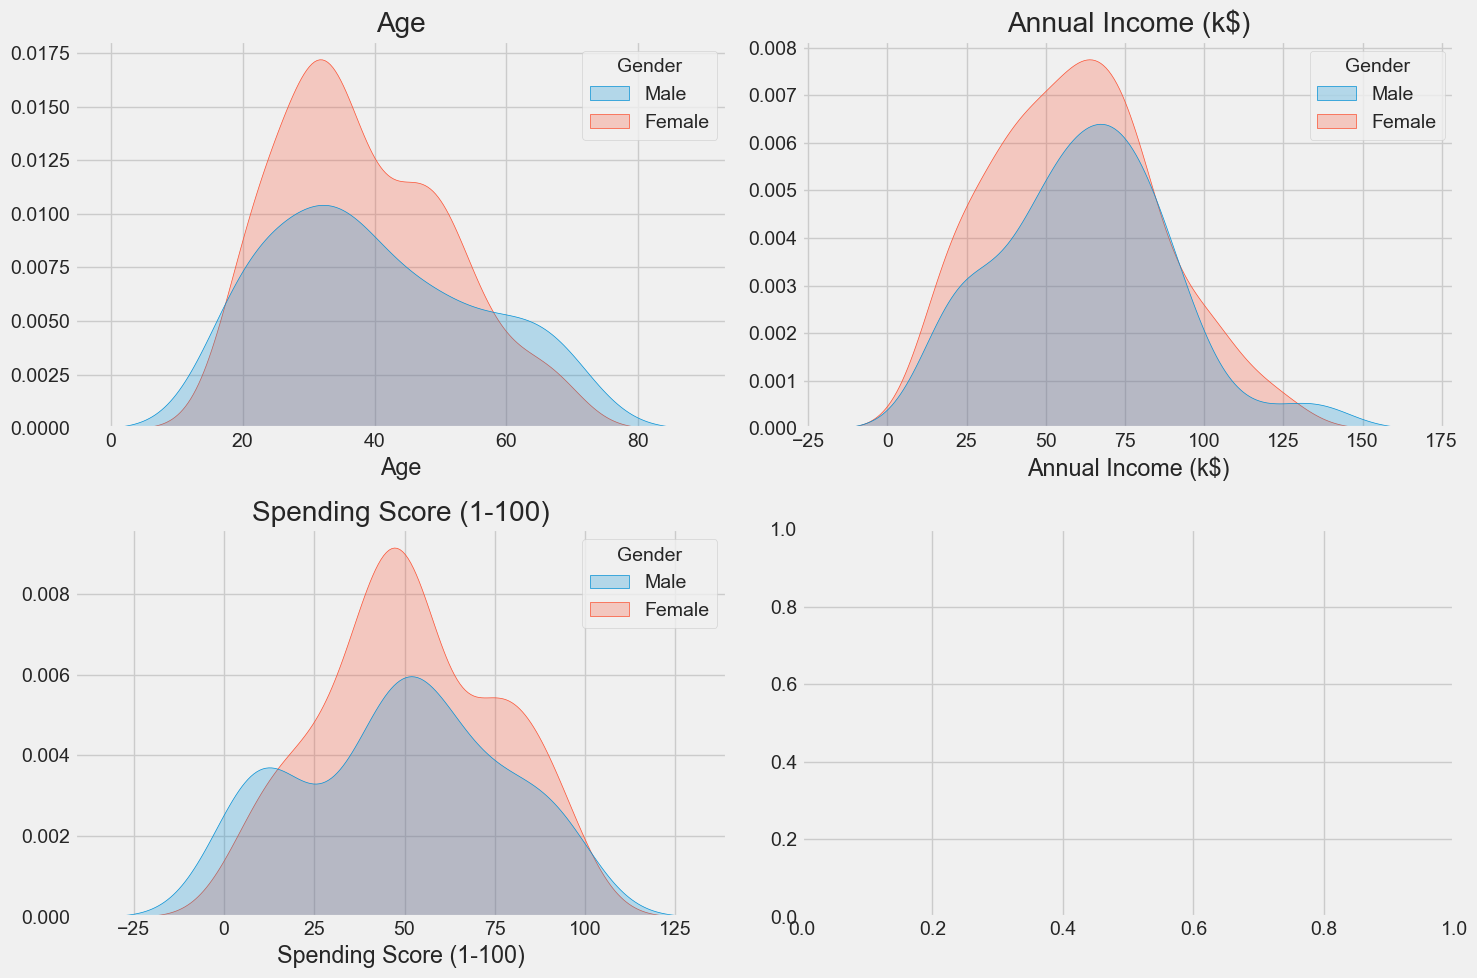

In [134]:
columns = list(df.columns[2:])
num_plots = list(range(3))

fig, axes = plt.subplots(2,2, figsize=(15,10))
for ax, col in zip(axes.ravel(), columns):
    sns.kdeplot(data=df, x=col, shade=True, hue='Gender', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

Boxplots segmented by gender

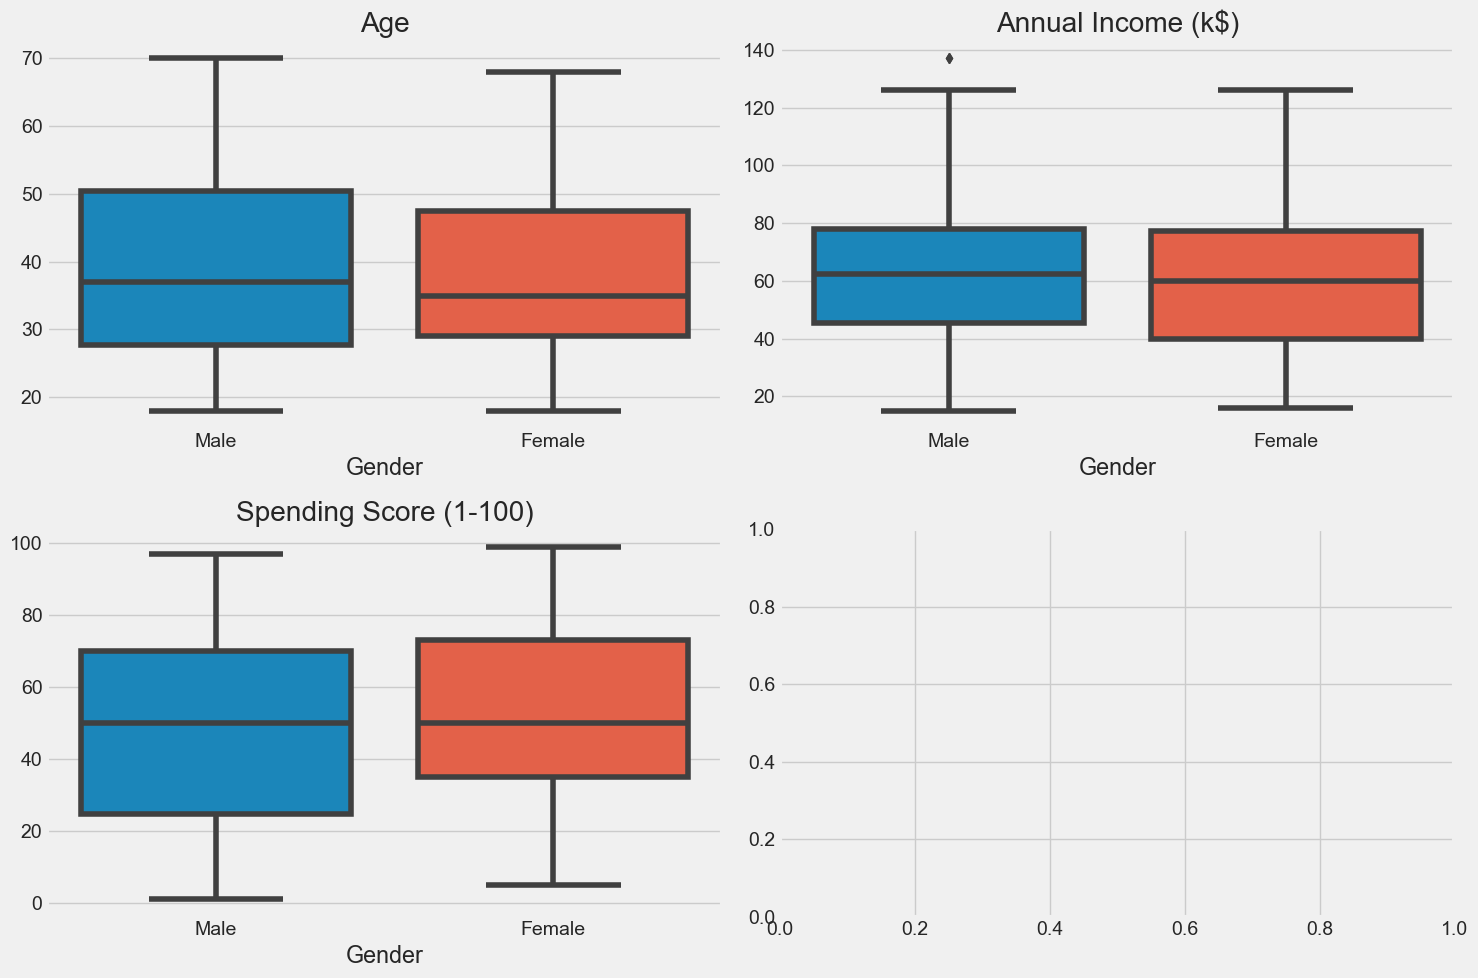

In [135]:
columns = list(df.columns[2:])
num_plots = list(range(3))

fig, axes = plt.subplots(2,2, figsize=(15,10))
for ax, col in zip(axes.ravel(), columns):
    sns.boxplot(data=df, x='Gender', y=col, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

An optimum cluster should have a gender spread that is as close to this as possible.

In [136]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

##### Bivariate Analysis

Scatterplot - Spending Score v. Annual Income

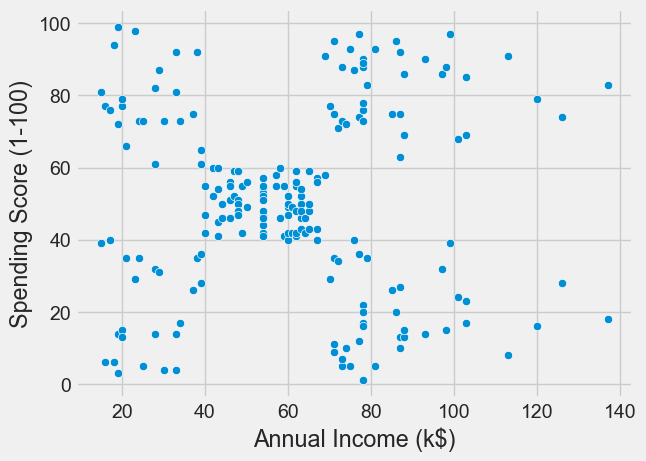

In [137]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

Pairplot for all columns excluding CustomerID

<Figure size 1000x800 with 0 Axes>

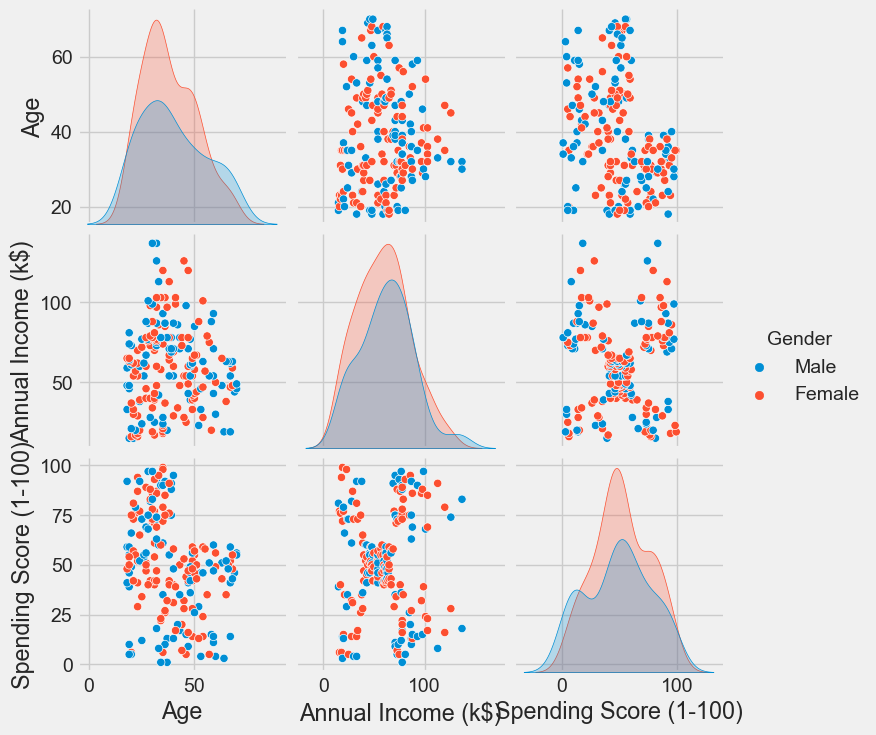

In [138]:
plt.figure(figsize=(10, 8))
sns.pairplot(df.drop(columns=['CustomerID']), hue='Gender')
plt.show()

In [139]:
df.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [140]:
df.groupby(by='Gender').agg({columns[0]: np.mean, columns[1]:np.mean, columns[2]:np.mean})

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [141]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


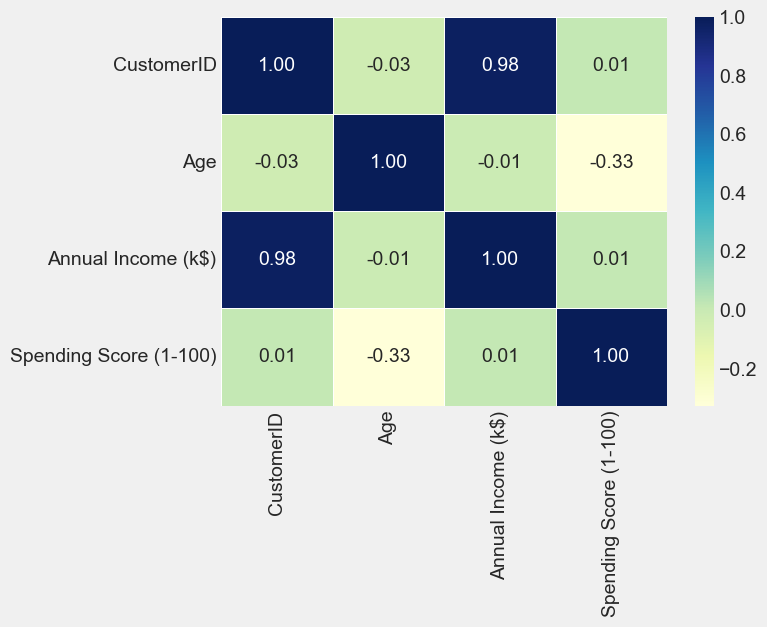

In [142]:
sns.heatmap(data=df.corr(),
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu")
plt.show()

### Clustering - Univariate, Bivariate, Multivariate

##### Univariate Clustering - By Annual Income
Instantiate & fit the model.

In [143]:
model1 = KMeans()
model1.fit(df[['Annual Income (k$)']])

../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/


KMeans()

Add clusters to the dataframe.

In [144]:
df['Income Cluster'] = model1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,6
2,3,Female,20,16,6,6
3,4,Female,23,16,77,6
4,5,Female,31,17,40,6


Check count spread across clusters

In [145]:
df['Income Cluster'].value_counts()

7    42
0    36
4    36
2    26
6    24
1    16
5    14
3     6
Name: Income Cluster, dtype: int64

Use inertia to determine optimum clusters

In [146]:
inertia_scores = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/


Optimum cluster is 3

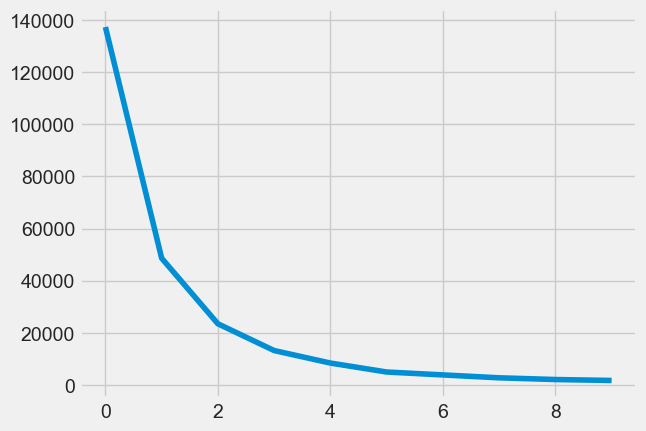

In [147]:
pd.Series(inertia_scores).plot()
plt.show()

In [148]:
model1 = KMeans(n_clusters=3)
model1.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = model1.labels_
df['Income Cluster'].value_counts()

../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/
../../compiler/lib/


0    92
1    72
2    36
Name: Income Cluster, dtype: int64

Check cluster centers.

In [149]:
centers = pd.DataFrame(model1.cluster_centers_)
# centers.columns= ['x']
centers

,0
0,66.717391
1,33.027778
2,99.888889


Cluster 0 has optimum gender spread.

In [150]:
pd.crosstab(df['Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Income Cluster,,
0,0.554348,0.445652
1,0.597222,0.402778
2,0.500000,0.500000


Plot Income v. Spending segmented by Clusters

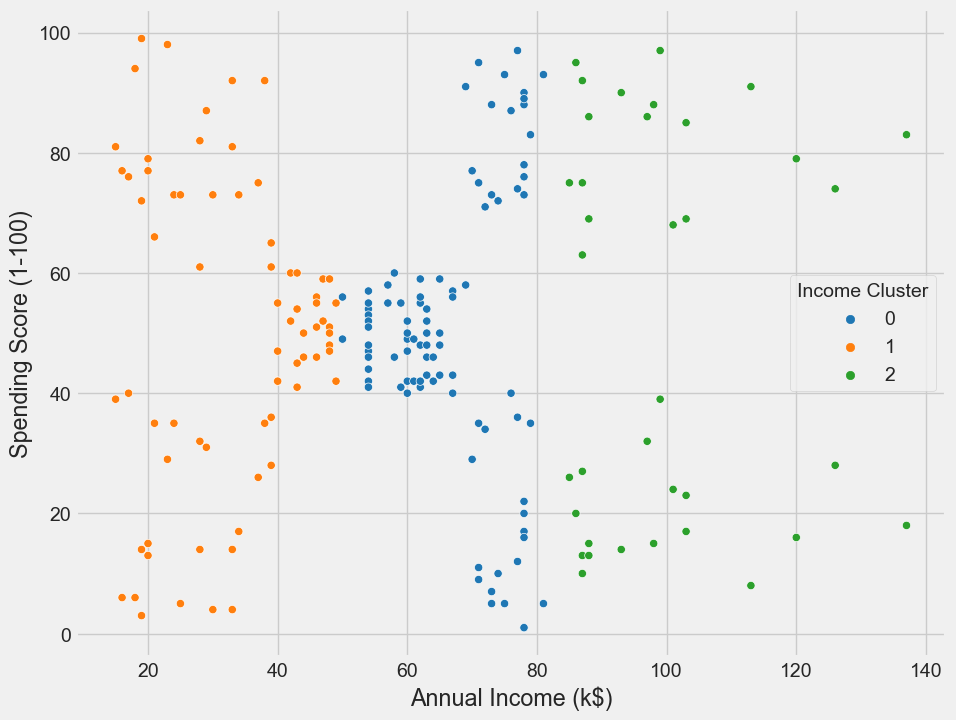

In [151]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='Income Cluster',
                palette='tab10')
plt.show()

Feature averages by clusters. Average annual income is 66k and average spending score is 50.

In [152]:
df.groupby(by='Income Cluster').agg({columns[0]: np.mean, columns[1]:np.mean, columns[2]:np.mean})

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


##### Bivariate Clustering - Income & Spending Score

Find optimum cluster

In [153]:
inertia_scores = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)

Optimum cluster is 5.

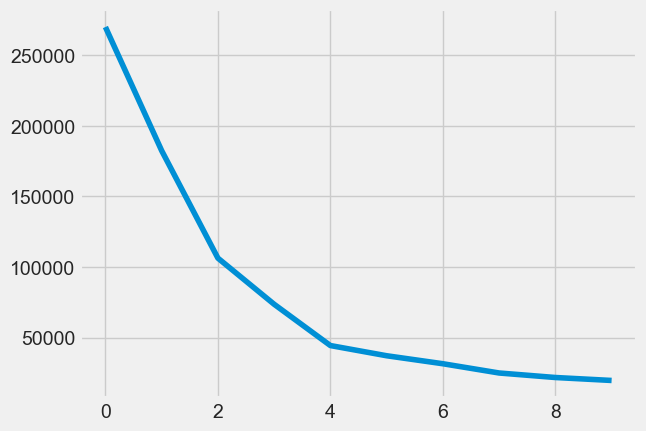

In [154]:
pd.Series(inertia_scores).plot()
plt.show()

Fit a bivariate model using income and spending.

In [155]:
model2 = KMeans(n_clusters=5)
model2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending & Income Cluster'] = model2.labels_
df['Spending & Income Cluster'].value_counts()

4    81
0    39
1    35
2    23
3    22
Name: Spending & Income Cluster, dtype: int64

With 2 features, we can plot x,y centers.

In [156]:
centers = pd.DataFrame(model2.cluster_centers_)
centers.columns= ['x', 'y']
centers

,x,y
0,86.538462,82.128205
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,55.296296,49.518519


Plot the income v spending chart segmented by clusters

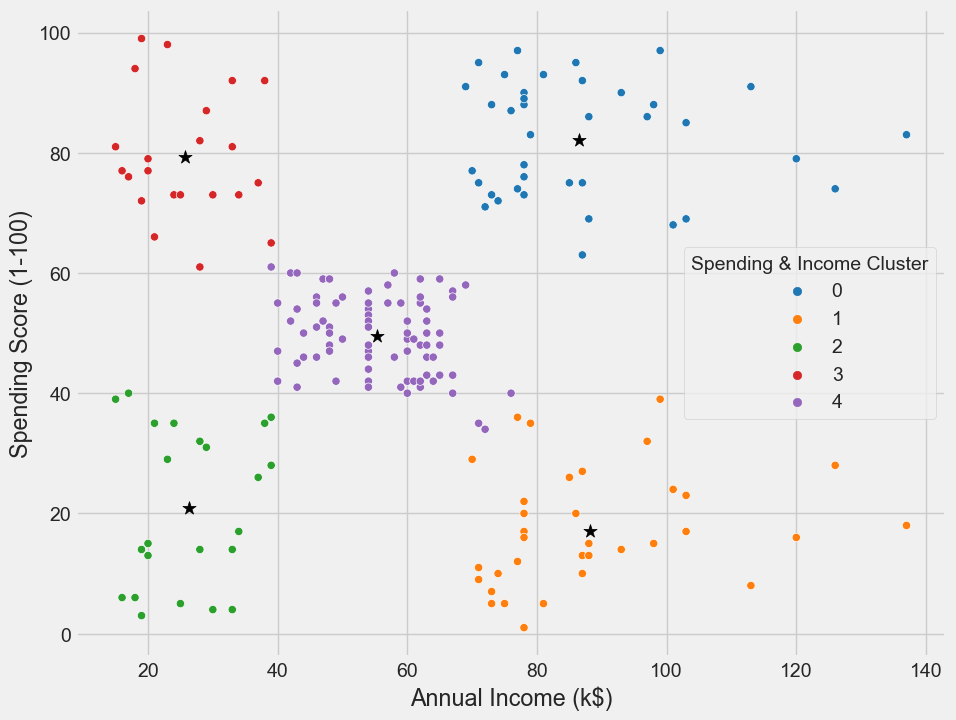

In [157]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='Spending & Income Cluster',
                palette='tab10')
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
plt.show()

Check % of male and females in each cluster. Cluster 0 is optimum

In [168]:
pd.crosstab(df['Spending & Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.592593,0.407407


Averages across features by clusters.

In [159]:
df.groupby(by='Spending & Income Cluster').agg({columns[0]: np.mean, columns[1]:np.mean, columns[2]:np.mean})

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,32.692308,86.538462,82.128205
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


##### Multivariate Clustering
Convert gender column to numeric and select the columns for multivariate modelling.

In [160]:
df_copy = pd.get_dummies(df, drop_first=True)
df_copy = df_copy[['CustomerID', 'Age', 'Annual Income (k$)',
                   'Spending Score (1-100)', 'Gender_Male']]
df_copy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


Scale data before modeling.

In [161]:
scale = StandardScaler()
df_copy = pd.DataFrame(scale.fit_transform(df_copy))
df_copy.columns = ['CustomerID', 'Age', 'Annual Income (k$)',
                   'Spending Score (1-100)', 'Gender_Male']
df_copy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.886405


Optimum cluster is 5

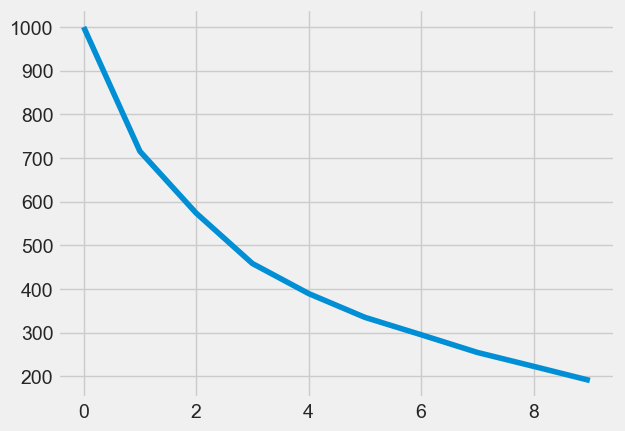

In [162]:
inertia_scores = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_copy)
    inertia_scores.append(kmeans.inertia_)

pd.Series(inertia_scores).plot()
plt.show()

In [163]:
model3 = KMeans(n_clusters=5)
model3.fit(df_copy)
df['Cluster'] = model3.labels_
df['Cluster'].value_counts()

3    53
2    41
0    40
4    37
1    29
Name: Cluster, dtype: int64

In [164]:
centers = pd.DataFrame(model3.cluster_centers_)
# centers.columns= ['x', 'y']
centers

,0,1,2,3,4
0,1.047471,-0.452130,0.972939,1.214144,0.070510
1,-0.523504,1.282768,-0.476776,-0.406689,1.128152
2,-0.499978,0.761690,-0.449617,-0.331593,-0.886405
3,-0.871755,-1.002093,-0.841658,0.412681,-0.088184
4,1.080673,0.074773,1.025705,-1.217528,0.148097


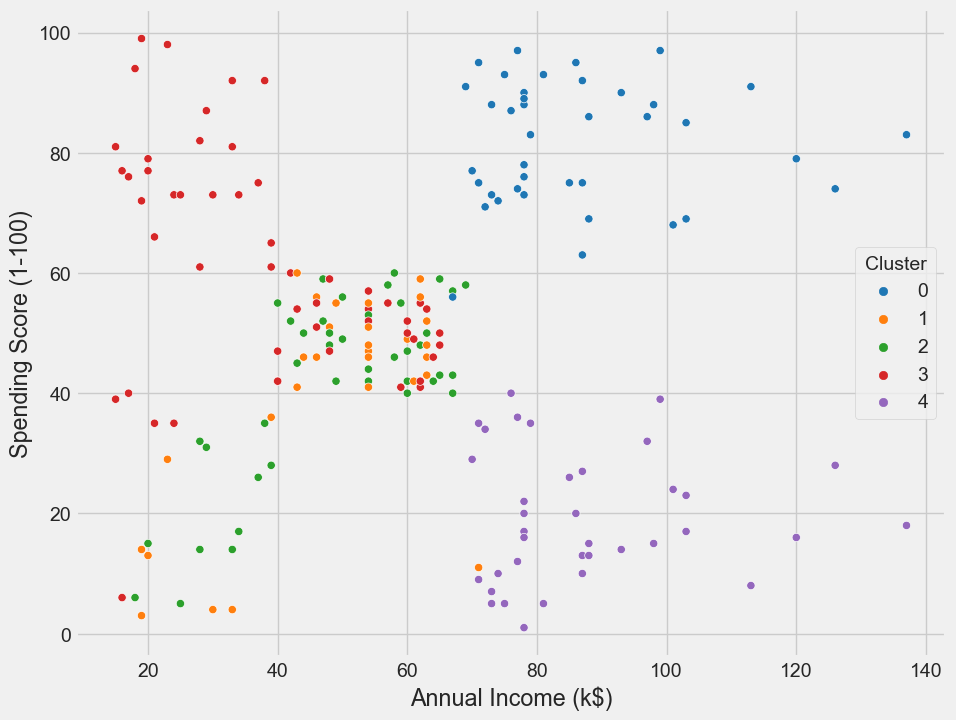

In [165]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='Cluster',
                palette='tab10')
# plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
plt.show()

The second cluster has the best spread for gender.

In [166]:
pd.crosstab(df['Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Cluster,,
0,0.525000,0.475000
1,0.000000,1.000000
2,1.000000,0.000000
3,0.603774,0.396226
4,0.486486,0.513514


In [167]:
df.groupby(by='Cluster').agg({columns[0]: np.mean, columns[1]:np.mean, columns[2]:np.mean})

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.550000,86.050000,81.475000
1,56.724138,48.068966,39.724138
2,49.463415,48.780488,41.658537
3,24.886792,38.509434,60.830189
4,39.891892,87.432432,18.837838


### Conclusion
The optimum model is the bivariate model using spending and income features to fit the model.